# IV.Predictive Analysis

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [12]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)
# Load the merged patient and demographic dataset
df = pd.read_csv(patients_demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


***Q1:Can we predict a patient’s average glucose level using their average daily steps?***
**By predicting glucose based on steps, we can provide personalized lifestyle recommendations in real time, e.g., encouraging more activity for patients likely to have higher glucose.**

Intercept: 132.69
Steps coefficient: 0.6434
   patient_id      steps     glucose  predicted_glucose
0   HUPA0001P  19.467529  181.443726         145.212738
1   HUPA0002P  39.242377  113.469632         157.935759
2   HUPA0003P  27.411141  143.273528         150.323611
3   HUPA0004P  30.704460  180.377984         152.442514
4   HUPA0005P  13.479264  147.698600         141.359923
5   HUPA0006P  34.008297  165.204585         154.568183
6   HUPA0007P  46.025927  173.151983         162.300256
7   HUPA0009P  47.352308  193.739271         163.153642
8   HUPA0010P  44.621304  135.892742         161.396529
9   HUPA0011P  54.583746  159.108570         167.806306
10  HUPA0014P  35.654740  188.061765         155.627495
11  HUPA0015P  47.731276  163.518724         163.397468
12  HUPA0016P  43.735332  150.208344         160.826501
13  HUPA0017P  27.504585  200.795249         150.383733
14  HUPA0018P  34.664698  143.677664         154.990508
15  HUPA0019P  45.729184  162.930477         162.109333
16  

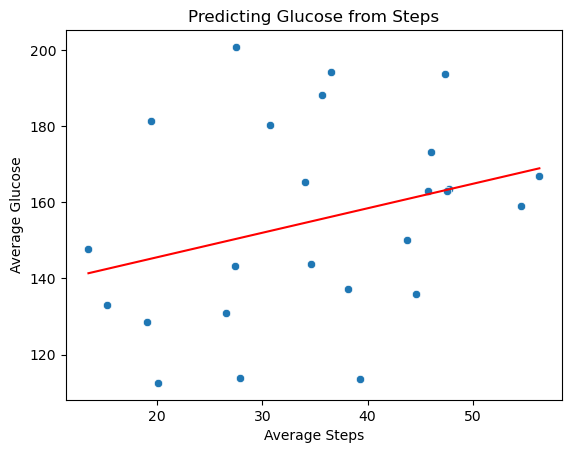

In [14]:


# Aggregate per patient
df_avg = df.groupby("patient_id")[["glucose", "steps"]].mean().reset_index()

# Define predictor (X) and outcome (y)
X = df_avg[["steps"]]
y = df_avg["glucose"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict glucose
df_avg["predicted_glucose"] = model.predict(X)

# Print simple coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Steps coefficient: {model.coef_[0]:.4f}")

# Print predictions for each patient
print(df_avg[["patient_id", "steps", "glucose", "predicted_glucose"]])

# Visualize
sns.scatterplot(x="steps", y="glucose", data=df_avg)
sns.lineplot(x="steps", y="predicted_glucose", data=df_avg, color="red")
plt.title("Predicting Glucose from Steps")
plt.xlabel("Average Steps")
plt.ylabel("Average Glucose")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted average glucose using average daily steps with a simple linear regression:<br>
<b>Predicted Glucose = Intercept + Steps coefficient × Steps</b><br><br>
<b>Why this model:</b> Linear regression is easy to interpret, helping guide real-time lifestyle recommendations.<br><br>
<b>Key Insight:</b><br>
Steps alone partially predict glucose. Patients with more steps tend to have slightly higher predicted glucose in this dataset, but combining activity with diet or insulin adjustments would improve predictions.
</span>


**Q2:Can we predict a patient’s daily carbohydrate intake based on their average glucose level?Predicting carb intake helps clinicians monitor diet and provide personalized recommendations.**

Intercept: 0.42
Glucose coefficient: -0.0020
   patient_id     glucose  carb_input  predicted_carb
0   HUPA0001P  181.443726    0.029541        0.063798
1   HUPA0002P  113.469632    0.199937        0.198571
2   HUPA0003P  143.273528    0.115119        0.139479
3   HUPA0004P  180.377984    0.634422        0.065911
4   HUPA0005P  147.698600    0.022939        0.130705
5   HUPA0006P  165.204585    0.097817        0.095996
6   HUPA0007P  173.151983    0.071429        0.080238
7   HUPA0009P  193.739271    0.013248        0.039420
8   HUPA0010P  135.892742    0.035534        0.154112
9   HUPA0011P  159.108570    0.293045        0.108082
10  HUPA0014P  188.061765    0.047140        0.050677
11  HUPA0015P  163.518724    0.000000        0.099338
12  HUPA0016P  150.208344    0.085984        0.125729
13  HUPA0017P  200.795249    0.047235        0.025430
14  HUPA0018P  143.677664    0.000000        0.138677
15  HUPA0019P  162.930477    0.014282        0.100505
16  HUPA0020P  194.282669    0.000000

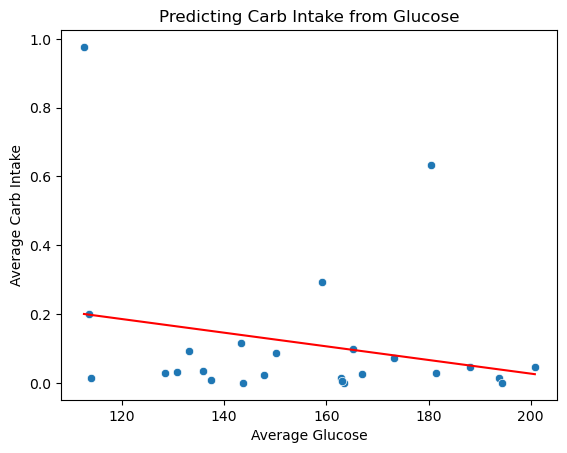

In [66]:


# Aggregate per patient
df_avg = df.groupby("patient_id")[["glucose", "carb_input"]].mean().reset_index()

# Define predictor (X) and outcome (y)
X = df_avg[["glucose"]]   # predictor
y = df_avg["carb_input"]  # outcome

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict carb intake
df_avg["predicted_carb"] = model.predict(X)

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Glucose coefficient: {model.coef_[0]:.4f}")

# Show predictions
print(df_avg[["patient_id", "glucose", "carb_input", "predicted_carb"]])

# Visualize
sns.scatterplot(x="glucose", y="carb_input", data=df_avg)
sns.lineplot(x="glucose", y="predicted_carb", data=df_avg, color="red")
plt.title("Predicting Carb Intake from Glucose")
plt.xlabel("Average Glucose")
plt.ylabel("Average Carb Intake")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted carb intake using average glucose:<br>
<b>Predicted Carb Intake = Intercept+(Glucose coefficient×Glucose)</b><br><br>
<b>Key Insight:</b> Glucose alone weakly predicts carb intake. Adding activity or insulin data would improve predictions.
</span>


**Q3: Can we predict a patient’s average basal insulin rate using their average glucose level? Predicting basal rate helps clinicians anticipate insulin needs and manage glucose proactively.**



Intercept: 0.08
Glucose coefficient: -0.0002


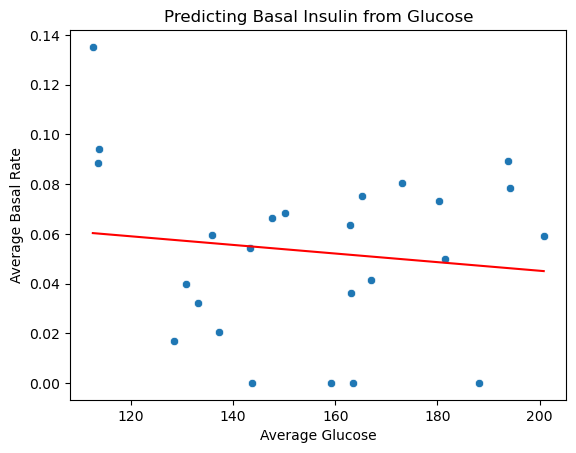

In [69]:


# Aggregate per patient
df_avg = df.groupby("patient_id")[["glucose", "basal_rate"]].mean().reset_index()

# Define predictor (X) and outcome (y)
X = df_avg[["glucose"]]
y = df_avg["basal_rate"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict basal rate
df_avg["predicted_basal"] = model.predict(X)

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Glucose coefficient: {model.coef_[0]:.4f}")

# Visualize
sns.scatterplot(x="glucose", y="basal_rate", data=df_avg)
sns.lineplot(x="glucose", y="predicted_basal", data=df_avg, color="red")
plt.title("Predicting Basal Insulin from Glucose")
plt.xlabel("Average Glucose")
plt.ylabel("Average Basal Rate")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted basal insulin using average glucose:<br>
<b>Predicted Basal Rate = Intercept+(Glucose coefficient×Glucose)</b><br><br>
<b>Key Insight:</b> Glucose alone weakly predicts basal insulin. Combining with activity or carb intake would improve predictions.
</span>


***Q4 : Can we predict a patient’s average glucose based on their bolus insulin dose?? Understanding this relationship helps optimize insulin dosing and manage glucose levels effectively***
**Bolus insulinis short-term insulin taken to cover meals; directly affects blood glucose**


Intercept: 159.36
Bolus coefficient: -79.9650


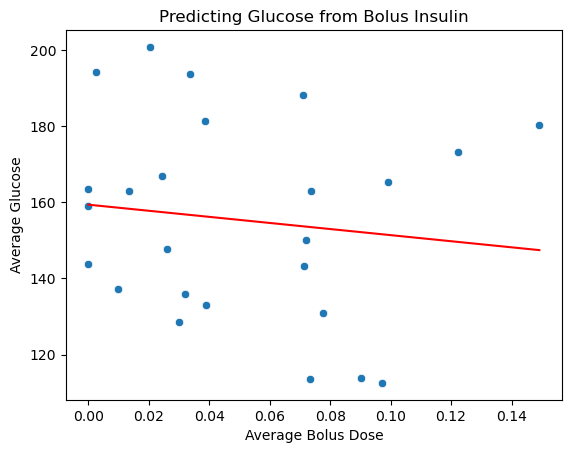

In [72]:

# Aggregate per patient
df_avg = df.groupby("patient_id")[["glucose", "bolus_volume_delivered"]].mean().reset_index()

# Define predictor (X) and outcome (y)
X = df_avg[["bolus_volume_delivered"]]
y = df_avg["glucose"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict glucose
df_avg["predicted_glucose"] = model.predict(X)

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Bolus coefficient: {model.coef_[0]:.4f}")

# Visualize
sns.scatterplot(x="bolus_volume_delivered", y="glucose", data=df_avg)
sns.lineplot(x="bolus_volume_delivered", y="predicted_glucose", data=df_avg, color="red")
plt.title("Predicting Glucose from Bolus Insulin")
plt.xlabel("Average Bolus Dose")
plt.ylabel("Average Glucose")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted average glucose using bolus insulin dose:<br>
<b>Predicted Glucose = Intercept+(Bolus coefficient×Bolus Dose)</b><br><br>
<b>Key Insight:</b> Higher bolus insulin is strongly associated with lower glucose. This model shows bolus dose is a good predictor for managing glucose levels.
</span>


***Q5 Can we predict a patient’s average glucose variability (standard deviation) based on their basal insulin rate?
Predicting variability helps clinicians identify patients at risk of unstable glucose and optimize basal insulin dosing.***

Intercept: 65.31
Basal coefficient: -197.9846


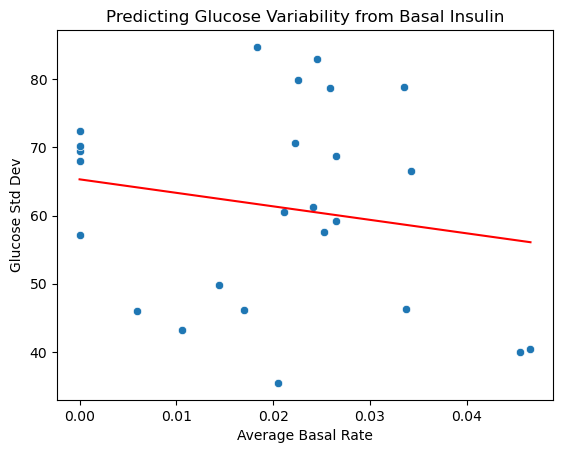

In [75]:


# Aggregate per patient
df_avg = df.groupby("patient_id")[["glucose", "basal_rate"]].std().reset_index()
df_avg.rename(columns={"glucose":"glucose_std"}, inplace=True)

# Define predictor (X) and outcome (y)
X = df_avg[["basal_rate"]]
y = df_avg["glucose_std"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict glucose variability
df_avg["predicted_glucose_std"] = model.predict(X)

# Print coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Basal coefficient: {model.coef_[0]:.4f}")

# Visualize
sns.scatterplot(x="basal_rate", y="glucose_std", data=df_avg)
sns.lineplot(x="basal_rate", y="predicted_glucose_std", data=df_avg, color="red")
plt.title("Predicting Glucose Variability from Basal Insulin")
plt.xlabel("Average Basal Rate")
plt.ylabel("Glucose Std Dev")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted glucose variability (Std Dev) using basal insulin rate:<br>
<b>Predicted Glucose Variability = Intercept+(Basal coefficient×Basal Rate)</b><br><br>
<b>Key Insight:</b> Higher basal insulin is strongly associated with lower glucose variability. Adjusting basal insulin can help stabilize glucose levels.
</span>


***Q6. Can we predict HbA1c from Average Glucose***  

Intercept: 1.6271777003484305
Coefficient: 0.0348432055749129


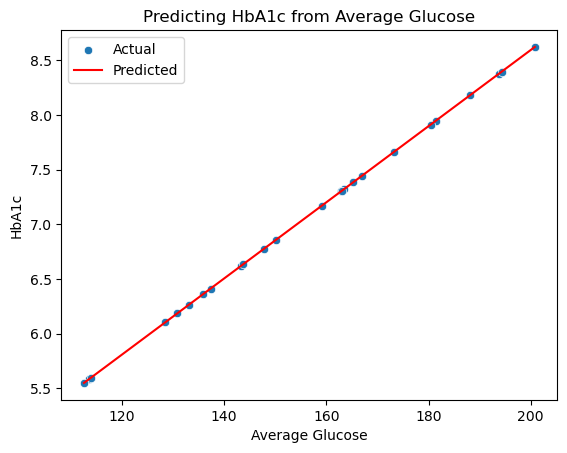

In [66]:
# HbA1c ≈ (Average Glucose + 46.7) / 28.7 (ADA formula)
hba1c_df = df.groupby("patient_id")[["glucose"]].mean().reset_index()
hba1c_df["HbA1c"] = (hba1c_df["glucose"] + 46.7) / 28.7

X = hba1c_df[["glucose"]]
y = hba1c_df["HbA1c"]

model = LinearRegression()
model.fit(X, y)
hba1c_df["predicted_HbA1c"] = model.predict(X)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

sns.scatterplot(x="glucose", y="HbA1c", data=hba1c_df, label="Actual")
sns.lineplot(x="glucose", y="predicted_HbA1c", data=hba1c_df, color="red", label="Predicted")
plt.title("Predicting HbA1c from Average Glucose")
plt.xlabel("Average Glucose")
plt.ylabel("HbA1c")
plt.legend()
plt.show()

<span style="color:green">
<b>Predictive Analysis:</b> We estimate HbA1c (long-term glucose control) using average glucose levels with Linear Regression.<br>
<b>Key Insight:</b> HbA1c strongly correlates with average glucose (expected).
A good fit means average glucose is a reliable proxy for long-term diabetes control.
</span>

***Q7. Can we predict a patient’s average heart rate from their daily steps?***

Intercept: 76.23
Steps coefficient: -0.0034


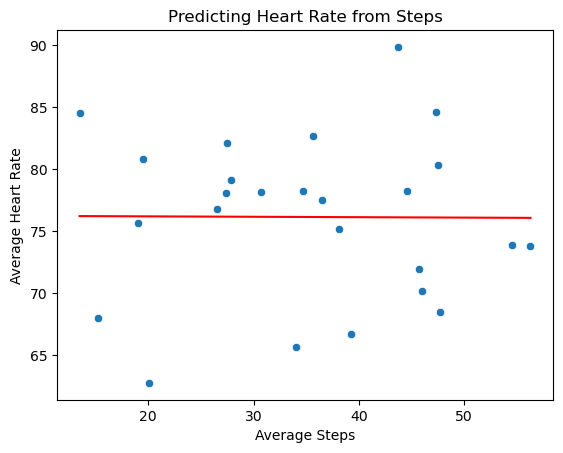

In [64]:
# Aggregate data per patient
df_avg = df.groupby("patient_id")[["steps", "heart_rate"]].mean().reset_index()

# Define predictor and target
X = df_avg[["steps"]]
y = df_avg["heart_rate"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
df_avg["predicted_hr"] = model.predict(X)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Steps coefficient: {model.coef_[0]:.4f}")

# Visualize
sns.scatterplot(x="steps", y="heart_rate", data=df_avg)
sns.lineplot(x="steps", y="predicted_hr", data=df_avg, color="red")
plt.title("Predicting Heart Rate from Steps")
plt.xlabel("Average Steps")
plt.ylabel("Average Heart Rate")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b>We use Linear Regression to test if glucose levels can predict sleep duration. Poor glucose control is often linked to poor sleep quality.<br>
<b>Key Insight:</b> If the coefficient is positive, more steps → higher heart rate (expected).
If weak, it means other factors (stress, medications) may influence heart rate more than steps.
This model helps verify whether physical activity level aligns with expected cardiovascular responses.
</span>

***Q8. Can we predict sleep duration from average glucose levels?***

Intercept: 6.29
Glucose coefficient: -0.0021


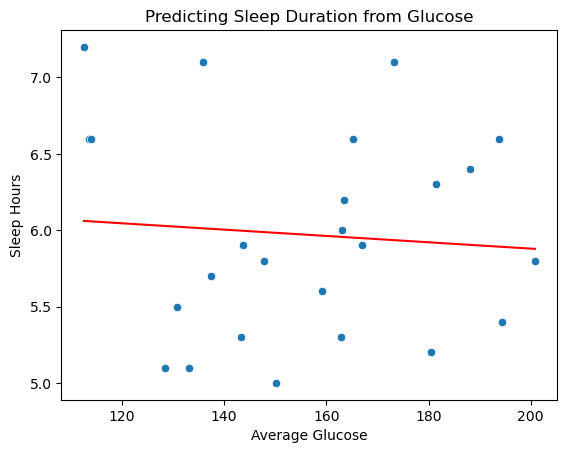

In [61]:
# Aggregate data per patient
df_avg = df.groupby("patient_id")[["glucose", "avg_sleep_duration_hrs"]].mean().reset_index()

# Define predictor and target
X = df_avg[["glucose"]]
y = df_avg["avg_sleep_duration_hrs"]

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
df_avg["predicted_sleep"] = model.predict(X)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Glucose coefficient: {model.coef_[0]:.4f}")

# Visualize
sns.scatterplot(x="glucose", y="avg_sleep_duration_hrs", data=df_avg)
sns.lineplot(x="glucose", y="predicted_sleep", data=df_avg, color="red")
plt.title("Predicting Sleep Duration from Glucose")
plt.xlabel("Average Glucose")
plt.ylabel("Sleep Hours")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b> We use Linear Regression to test if physical activity (steps) can predict average heart rate. This helps assess cardiovascular fitness.<br>
<b>Key Insight:</b> If coefficient is negative, higher glucose → fewer sleep hours (consistent with diabetes research).
A weak correlation indicates sleep is affected by multiple other factors (stress, routines).
This can highlight the importance of lifestyle management beyond medication.
</span>

***Q9 Can we predict a patient’s daily calories burned using steps, heart rate, and basal insulin rate. Understanding how activity and insulin affect energy expenditure can help guide personalized health and diabetes management recommendations.***

Mean Squared Error: 15.374071563760143
R-squared: 0.6790589019627662


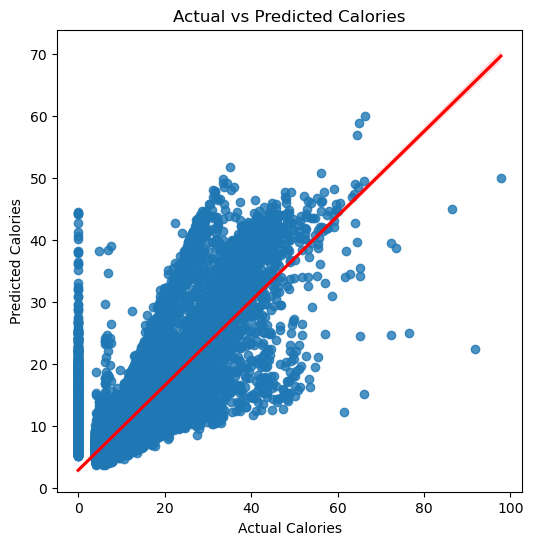

In [127]:

#Select features and target
X = df[["steps", "heart_rate", "basal_rate"]]
y = df["calories"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

# Combine test and predicted values into a dataframe
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Plot Actual vs Predicted with regression line
plt.figure(figsize=(6,6))
sns.regplot(x="Actual", y="Predicted", data=results, line_kws={"color":"red"})
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


<span style="color:green">
<b>Predictive Analysis:</b><br>
Predicted daily calories using steps, heart rate, and basal insulin rate:<br>
<b>Predicted Calories = Intercept + (Steps coefficient × Steps) + (Heart Rate coefficient × Heart Rate) + (Basal coefficient × Basal Rate)</b><br><br>
<b>Key Insight:</b> Steps and heart rate are the main drivers of calorie expenditure. Basal insulin has minor effect. The model explains ~68% of variability in calories burned, indicating a fairly good prediction for a simple model.
</span>
